In [1]:
import pyibl
import random
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

from tqdm import tqdm

PARTICIPANTS = 1000
NOISE = 0.25
TEMPERATURE = 1.0
DECAY = 0.5
DEFAULT_OUTPUT_FILE = "box-data_NoSignaling.csv"

TARGET_COUNT = 2
TRIALS = 50

def reset_agent(a, noise=NOISE, temperature=TEMPERATURE, decay=DECAY):
    a.reset(False)
    a.noise=noise
    a.teperature=temperature
    a.decay=decay

def run(output_file=DEFAULT_OUTPUT_FILE):
    selection_agent = pyibl.Agent("Selection Agent", optimized_learning=False)
    attack_agent = pyibl.Agent("Attack Agent", ["attack", "warning"], optimized_learning=False)
    if os.path.exists(output_file):
        os.remove(output_file)
    with open(output_file, "w") as f:
        print("Subject,Trial,Selected,Warining,Covered,Action,Outcome,Cum_Outcome", file=f)
        attacks = 0
        for p in range(PARTICIPANTS):
            COVERAGE = np.random.choice([0,1], size=(50,), p=[0.5, 0.5])
            total = 0
            reset_agent(selection_agent)
            reset_agent(attack_agent)
        
            # -------------- Populated Instances --------------#
            selection_agent.populate(110,0)
            selection_agent.populate(110,1)
            attack_agent.populate(-30,{"attack": False, "warning": 0})
            attack_agent.populate(110,{"attack": True, "warning": 0})
            attack_agent.populate(-55,{"attack": True, "warning": 0})
            
            for t in range(TRIALS):
                selected = selection_agent.choose(0,1)
                warned = 0
                attack = attack_agent.choose({"attack":True, "warning": warned}, {"attack": False, "warning": warned})["attack"]
                covered = selected == COVERAGE[t]
                if not attack:
                    payoff = 0
                else:
                    payoff = -50 if covered else 100
                    attacks += 1
                total += payoff
                attack_agent.respond(payoff)
                selection_agent.respond(payoff)
                print(f"{p + 1},{t + 1},{selected},{int(warned)},{int(covered)},{int(attack)},{payoff},{total}", file=f)
#     return attacks/(BLOCKS * TRIALS * PARTICIPANTS)

def main():
    run()


if __name__ == '__main__':
    main()

In [2]:
df = pd.read_csv('box-data_NoSignaling.csv')
df

,Subject,Trial,Selected,Warining,Covered,Action,Outcome,Cum_Outcome
0,1,1,0,0,0,1,100,100
1,1,2,1,0,0,1,100,200
2,1,3,1,0,1,1,-50,150
3,1,4,0,0,1,1,-50,100
4,1,5,1,0,1,1,-50,50
...,...,...,...,...,...,...,...,...
49995,1000,46,0,0,0,1,100,650
49996,1000,47,0,0,0,1,100,750
49997,1000,48,0,0,0,1,100,850
49998,1000,49,0,0,0,1,100,950


50000


<AxesSubplot:>

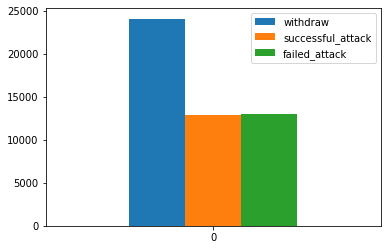

In [3]:
withdraw = df['Action'].value_counts()[0]
succ_attack = df[df['Action'] == 1]['Covered'].value_counts()[0]
fail_attack = df[df['Action'] == 1]['Covered'].value_counts()[1]

result = pd.DataFrame({
    'withdraw': [withdraw],
    'successful_attack': [succ_attack],
    'failed_attack': [fail_attack]})

result.plot.bar(rot=0)

In [4]:
import pyibl
import random
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

from tqdm import tqdm

PARTICIPANTS = 1000
NOISE = 0.25
TEMPERATURE = 1.0
DECAY = 0.5
DEFAULT_OUTPUT_FILE = "box-data_NoSignalingTwo.csv"

TARGET_COUNT = 2
TRIALS = 50

def reset_agent(a, noise=NOISE, temperature=TEMPERATURE, decay=DECAY):
    a.reset(False)
    a.noise=noise
    a.teperature=temperature
    a.decay=decay

def run(output_file=DEFAULT_OUTPUT_FILE):
    selection_agent = pyibl.Agent("Selection Agent", optimized_learning=False)
    attack_agent = pyibl.Agent("Attack Agent", ["attack", "warning"], optimized_learning=False)
    if os.path.exists(output_file):
        os.remove(output_file)
    with open(output_file, "w") as f:
        print("Subject,Trial,Selected,Warining,Covered,Action,Outcome,Cum_Outcome", file=f)
        attacks = 0
        for p in range(PARTICIPANTS):
            COVERAGE = np.random.choice([0,1], size=(50,), p=[0.5, 0.5])
            total = 0
            reset_agent(selection_agent)
            reset_agent(attack_agent)
        
            # -------------- Populated Instances --------------#
            selection_agent.populate(110,0)
            selection_agent.populate(110,1)
            attack_agent.populate(-30,{"attack": False, "warning": 0})
            attack_agent.populate(110,{"attack": True, "warning": 0})
            attack_agent.populate(-55,{"attack": True, "warning": 0})
            
            attack_agent.populate(-30,{"attack": False, "warning": 1})
            attack_agent.populate(110,{"attack": True, "warning": 1})
            attack_agent.populate(-55,{"attack": True, "warning": 1})
            
            for t in range(TRIALS):
                selected = selection_agent.choose(0,1)
                covered = selected == COVERAGE[t]
                if covered:
                    warned = 1
                else:
                    warned = np.random.choice([0,1], p=[0.5,0.5])
                
                attack = attack_agent.choose({"attack":True, "warning": warned}, {"attack": False, "warning": warned})["attack"]
                if not attack:
                    payoff = 0
                else:
                    payoff = -50 if covered else 100
                    attacks += 1
                total += payoff
                attack_agent.respond(payoff)
                selection_agent.respond(payoff)
                print(f"{p + 1},{t + 1},{selected},{int(warned)},{int(covered)},{int(attack)},{payoff},{total}", file=f)
#     return attacks/(BLOCKS * TRIALS * PARTICIPANTS)

def main():
    run()


if __name__ == '__main__':
    main()

In [5]:
dfTwo = pd.read_csv('box-data_NoSignalingTwo.csv')
dfTwo

,Subject,Trial,Selected,Warining,Covered,Action,Outcome,Cum_Outcome
0,1,1,0,1,1,1,-50,-50
1,1,2,1,1,1,0,0,-50
2,1,3,1,1,0,1,100,50
3,1,4,0,1,1,1,-50,0
4,1,5,1,0,0,1,100,100
...,...,...,...,...,...,...,...,...
49995,1000,46,0,1,0,0,0,750
49996,1000,47,0,0,0,1,100,850
49997,1000,48,0,1,0,0,0,850
49998,1000,49,0,1,0,0,0,850


50000


<AxesSubplot:>

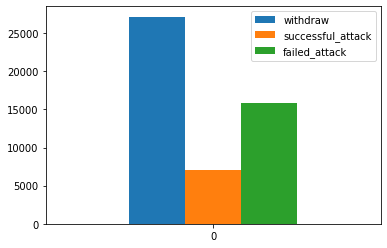

In [6]:
withdraw = dfTwo['Action'].value_counts()[0]
succ_attack = dfTwo[dfTwo['Action'] == 1]['Covered'].value_counts()[1]
fail_attack = dfTwo[dfTwo['Action'] == 1]['Covered'].value_counts()[0]

result = pd.DataFrame({
    'withdraw': [withdraw],
    'successful_attack': [succ_attack],
    'failed_attack': [fail_attack]})

result.plot.bar(rot=0)